In [110]:
import mne
import mne_bids
import numpy as np

In [131]:
output_dir = "/Users/daniel/Documents/Coding_Projects/GitHub/NMA-FacesHouses/data/output"
subjects_dir = "/Users/daniel/Documents/Coding_Projects/GitHub/NMA-FacesHouses/data/fs_subjects"
subjects = ["ap", "ca", "ha", "ja", "mv", "wc", "zt"]

freqs = np.linspace(1, 100, 25)
cycles = 2.
decimate = 20

In [132]:
for subject in subjects:
    epochs = mne.read_epochs(f"{output_dir}/epoched/{subject}-epo.fif.gz")
    tfr = mne.time_frequency.tfr_morlet(epochs, freqs, freqs/cycles, decim=decimate, n_jobs=-1, return_itc=False, average=False)
    tfr.save(f"{output_dir}/tfr/{subject}-tfr.h5", overwrite=True)

Reading /Users/daniel/Documents/Coding_Projects/GitHub/NMA-FacesHouses/data/output/epoched/ap-epo.fif.gz ...
    Found the data of interest:
        t =    -200.00 ...     800.00 ms
        0 CTF compensation matrices available
0 bad epochs dropped
Not setting metadata
930 matching events found
No baseline correction applied
0 projection items activated


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  14 tasks      | elapsed:   47.7s
[Parallel(n_jobs=4)]: Done  41 out of  41 | elapsed:  1.8min finished


Not setting metadata
Reading /Users/daniel/Documents/Coding_Projects/GitHub/NMA-FacesHouses/data/output/epoched/ca-epo.fif.gz ...
    Found the data of interest:
        t =    -200.00 ...     800.00 ms
        0 CTF compensation matrices available
0 bad epochs dropped
Not setting metadata
930 matching events found
No baseline correction applied
0 projection items activated


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  14 tasks      | elapsed:   35.3s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:  1.9min finished


Not setting metadata
Reading /Users/daniel/Documents/Coding_Projects/GitHub/NMA-FacesHouses/data/output/epoched/ha-epo.fif.gz ...
    Found the data of interest:
        t =    -200.00 ...     800.00 ms
        0 CTF compensation matrices available
0 bad epochs dropped
Not setting metadata
930 matching events found
No baseline correction applied
0 projection items activated


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  14 tasks      | elapsed:   41.4s
[Parallel(n_jobs=4)]: Done  39 out of  39 | elapsed:  1.6min finished


Not setting metadata
Reading /Users/daniel/Documents/Coding_Projects/GitHub/NMA-FacesHouses/data/output/epoched/ja-epo.fif.gz ...
    Found the data of interest:
        t =    -200.00 ...     800.00 ms
        0 CTF compensation matrices available
0 bad epochs dropped
Not setting metadata
930 matching events found
No baseline correction applied
0 projection items activated


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  14 tasks      | elapsed:   32.8s
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:  2.1min finished


Not setting metadata
Reading /Users/daniel/Documents/Coding_Projects/GitHub/NMA-FacesHouses/data/output/epoched/mv-epo.fif.gz ...
    Found the data of interest:
        t =    -200.00 ...     800.00 ms
        0 CTF compensation matrices available
0 bad epochs dropped
Not setting metadata
930 matching events found
No baseline correction applied
0 projection items activated


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  14 tasks      | elapsed:   33.8s
[Parallel(n_jobs=4)]: Done  58 out of  58 | elapsed:  2.2min finished


Not setting metadata
Reading /Users/daniel/Documents/Coding_Projects/GitHub/NMA-FacesHouses/data/output/epoched/wc-epo.fif.gz ...
    Found the data of interest:
        t =    -200.00 ...     800.00 ms
        0 CTF compensation matrices available
0 bad epochs dropped
Not setting metadata
930 matching events found
No baseline correction applied
0 projection items activated


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  14 tasks      | elapsed:   36.6s
[Parallel(n_jobs=4)]: Done  39 out of  39 | elapsed:  1.6min finished


Not setting metadata
Reading /Users/daniel/Documents/Coding_Projects/GitHub/NMA-FacesHouses/data/output/epoched/zt-epo.fif.gz ...
    Found the data of interest:
        t =    -200.00 ...     800.00 ms
        0 CTF compensation matrices available
0 bad epochs dropped
Not setting metadata
930 matching events found
No baseline correction applied
0 projection items activated


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  14 tasks      | elapsed:   30.0s
[Parallel(n_jobs=4)]: Done  58 out of  58 | elapsed:  1.8min finished


Not setting metadata


(58, 25, 51)
Using a threshold of 3.924330
stat_fun(H1): min=0.000000 max=14.269878
Running initial clustering
Found 17 clusters
Permuting 1023 times...


/var/folders/_r/kcfrqwd143bfg9vx3jtb4l6w0000gs/T/ipykernel_65055/998746137.py:9: RuntimeWarning: Ignoring argument "tail", performing 1-tailed F-test
  F, clusters, p, H0 = mne.stats.permutation_cluster_test([avg_face._data, avg_house._data], n_jobs=3, tail=0)


  0%|          |  : 0/1023 [00:00<?,       ?it/s]

Computing cluster p-values
Done.
Applying baseline correction (mode: percent)
Applying baseline correction (mode: percent)
Applying baseline correction (mode: mean)


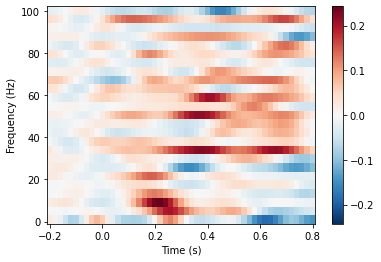

[<Figure size 432x288 with 2 Axes>]

In [137]:
avg_face = tfr["face"].average(copy=True)
avg_house = tfr["house"].average(copy=True)

#avg_face._data = np.log10(avg_face._data)
#avg_house._data = np.log10(avg_house._data)

print(avg_face._data.shape)

F, clusters, p, H0 = mne.stats.permutation_cluster_test([avg_face._data, avg_house._data], n_jobs=3, tail=0)

diff = avg_face.apply_baseline(baseline=(-0.2,0), mode="percent") - avg_house.apply_baseline(baseline=(-0.2,0), mode="percent")

diff.plot(combine="mean", baseline=(-0.2,0), mode="mean")

In [134]:
F

array([[7.21514299e-02, 4.82146237e-02, 1.47991822e-04, ...,
        9.10911518e-01, 1.17325516e+00, 1.24285354e+00],
       [6.26633713e-02, 8.17174688e-02, 9.45486592e-02, ...,
        5.23828237e-01, 4.93918006e-01, 4.79455383e-01],
       [4.02527675e-02, 3.76889041e-02, 3.24206098e-02, ...,
        8.72909936e-02, 1.02535360e-01, 1.22586119e-01],
       ...,
       [4.71464341e-02, 1.16272973e-02, 1.29777162e-03, ...,
        6.65632951e-01, 1.32390132e+00, 1.97003029e+00],
       [1.74640311e+00, 3.23566032e+00, 5.50962090e+00, ...,
        2.90974724e-01, 1.02500629e+00, 1.85586432e+00],
       [2.67513518e-02, 1.00602725e-05, 4.66544940e-02, ...,
        9.36328325e-01, 1.89551688e+00, 2.68773874e+00]])

Applying baseline correction (mode: percent)


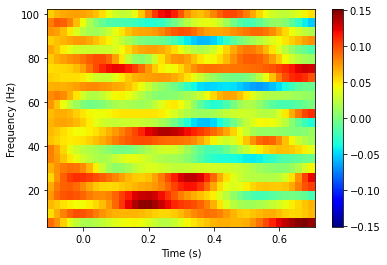

Applying baseline correction (mode: percent)


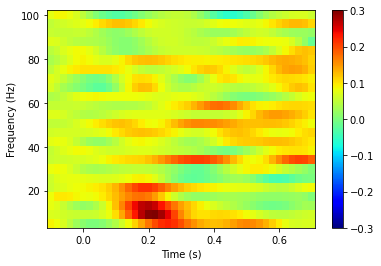

[<Figure size 432x288 with 2 Axes>]

In [136]:
tfr["house/clean"].average(copy=True).plot(combine="mean", baseline=(-0.2,0), mode="percent", cmap="jet", fmin=5, tmin=-0.1, tmax=0.7)
tfr["face/clean"].average(copy=True).plot(combine="mean", baseline=(-0.2,0), mode="percent", cmap="jet", fmin=5, tmin=-0.1, tmax=0.7)

Need more than one channel to make topography for ecog. Disabling interactivity.


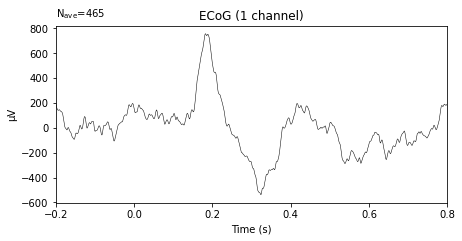

Need more than one channel to make topography for ecog. Disabling interactivity.


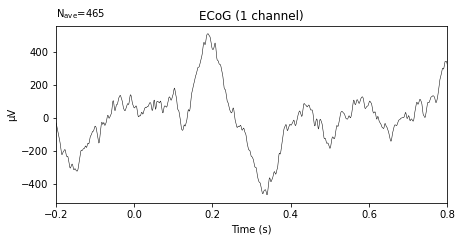

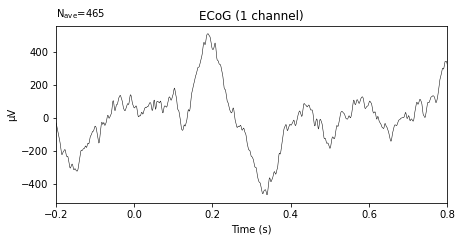

In [122]:
epochs["face/clean"].copy().pick_channels(["30"]).average().plot()
epochs["house/clean"].copy().pick_channels(["30"]).average().plot()

    Using multitaper spectrum estimation with 7 DPSS windows


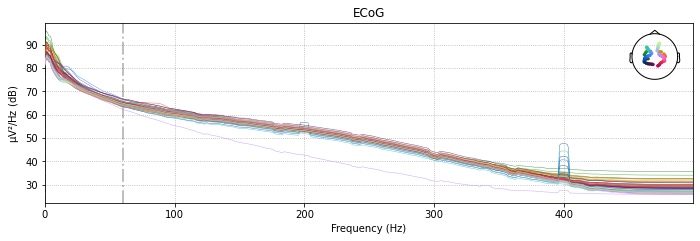

    Using multitaper spectrum estimation with 7 DPSS windows


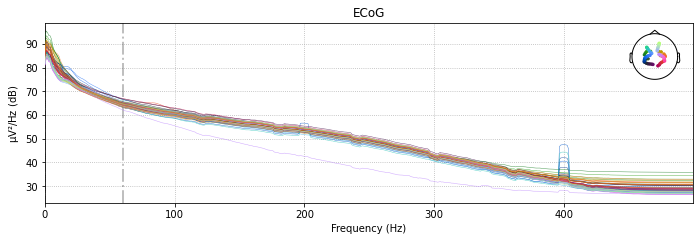

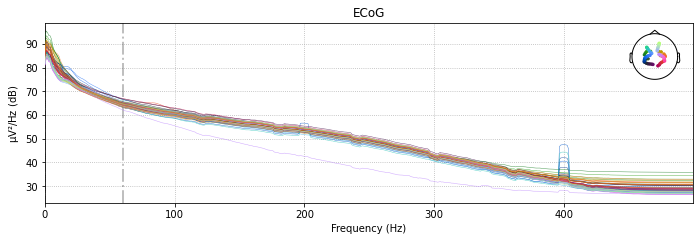

In [39]:
epochs["face"].plot_psd()
epochs["house"].plot_psd()

In [42]:
data = tfr._data

In [118]:
epochs.get_montage().get_positions()

{'ch_pos': OrderedDict([('0', array([-0.00321136,  0.07668878,  0.00369079])),
              ('1', array([-0.03346955,  0.07804156,  0.01974254])),
              ('2', array([ 0.00011492,  0.05959872, -0.00268667])),
              ('3', array([-0.00611919,  0.05439698, -0.00581975])),
              ('4', array([-0.0151782 ,  0.05130165, -0.00287004])),
              ('5', array([-0.02434765,  0.04906509, -0.00020092])),
              ('6', array([-0.03905567,  0.04020691,  0.00504895])),
              ('7', array([-0.04771427, -0.00922749, -0.00555659])),
              ('8', array([-0.04213168, -0.00095424, -0.00605202])),
              ('9', array([-0.03340404,  0.00471734, -0.00984347])),
              ('10', array([-0.02698582,  0.01060032, -0.01355498])),
              ('11', array([-0.02100762,  0.01934654, -0.01423475])),
              ('12', array([-0.01932989,  0.02859209, -0.01612192])),
              ('13', array([-0.02324811,  0.03720503, -0.01478998])),
              ('14',

Not setting metadata
930 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
combining channels using "mean"


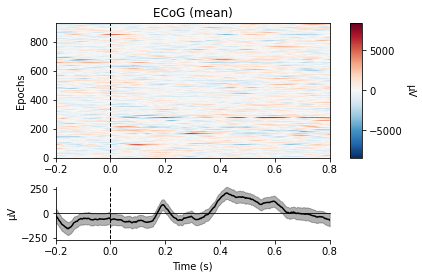

[<Figure size 432x288 with 3 Axes>]

In [117]:
mne.viz.plot_epochs_image(epochs["clean"].copy(), combine="mean")

In [108]:
epochs.event_id

{'face/clean': 10001,
 'house/clean': 10002,
 'face/noisy': 10001,
 'house/noisy': 10002}